In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

## What are the most demanded skills for the top 3 most popular data job roles?

In the exploratory data analysis section, it revealed that data analysts, data scinetists and data enginner were the jobs with the greatest job postings in the United States

### Methodology

  - Filter for job postings in the US
  - Run the explode method on the skills column
  - Calculate skill count based on job_title_short
  - Calculate skill percentage
  - Plot final findings

In [2]:
df_US = df[df['job_country'] == 'United States']
df_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [8]:
df_skills = df_US.explode('job_skills')
df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [ ]:
df_skills_count =df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count
# This Series has a multi-level index (based on the grouping columns) and contains the 
# counts as its values.

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [ ]:
df_skills_count = df_skills_count.reset_index(name='skill_count')

In [17]:
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


### Calculating Skill Percentage

In [ ]:
df_job_total = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_total
# create an additional df to merge to calculate percentages for each skill corresponding
# to a given job

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [30]:
df_skills_percent = pd.merge(df_skills_count, df_job_total, how='left', on='job_title_short')
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [36]:
df_skills_percent['Percentage'] =  (df_skills_percent['skill_count'] / df_skills_percent['jobs_total']) * 100
df_skills_percent

# Now we create a new column which has the percentages for each skill in a given
# job

,job_skills,job_title_short,skill_count,jobs_total,Percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


### Plotting the data

In [19]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

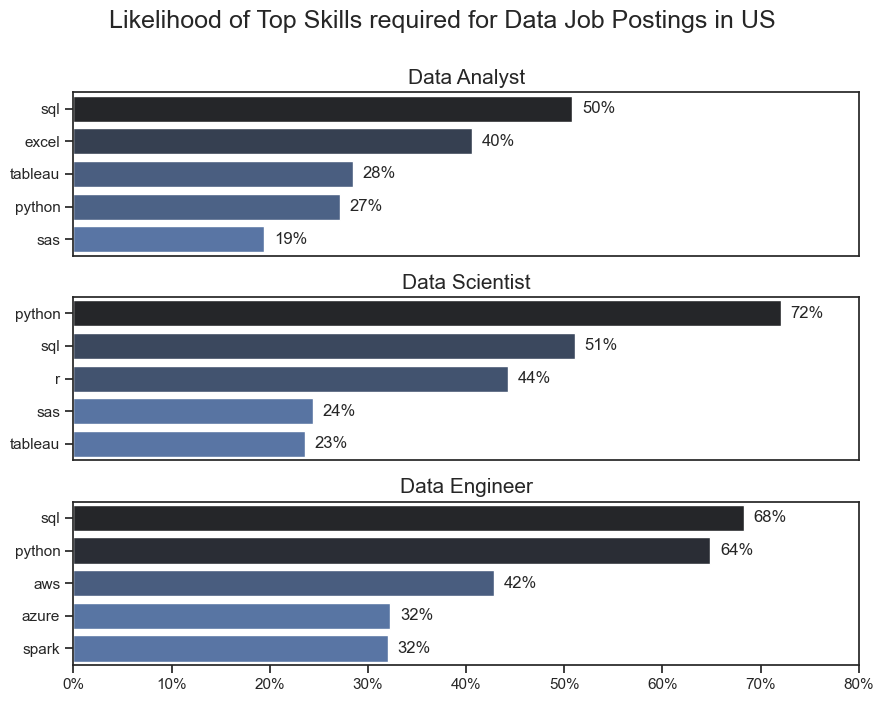

In [69]:
fig, ax = plt.subplots(3,1, figsize = (9, 7))
sns.set_theme(style='ticks')

for i, job in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job].head(5)
#   df_plot.plot(kind='barh', x='job_skills', y='Percentage', ax=ax[i], title=job)
    sns.barplot(data=df_plot, x='Percentage', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].legend().set_visible(False)
    ax[i].set_title(job, fontsize=15)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 80)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))

    for n, v in enumerate(df_plot['Percentage']):
        ax[i].text(v+1, n, f'{int(v)}%', va='center') #(x-axis, y-axis, plot v next to labels)

    if i != len(job_titles)-1:
        ax[i].set_xticks([])


fig.suptitle('Likelihood of Top Skills required for Data Job Postings in US', fontsize=18, y=1)
fig.tight_layout()


In [59]:
for n, v in enumerate(df_skills_percent['Percentage']):
    print(n, v)

0 72.03637599864014
1 50.80217057921435
2 51.052184259731426
3 40.57891942904329
4 44.232534421213664
5 68.29532497149373
6 64.88597491448118
7 28.475580983838622
8 27.105697770437654
9 42.81071835803877
10 24.375318714941358
11 23.557708652048277
12 19.464433172112773
13 17.19210805709567
14 17.149345287247847
15 32.27194982896237
16 32.046750285062714
17 17.487676355600883
18 16.811150773414923
19 75.8226479221381
20 23.834093500570123
21 23.346636259977195
22 66.17759307946739
23 11.223015217647752
24 57.32272516607446
25 12.468128505864355
26 10.580099091659784
27 11.964983851776305
28 11.6913139554649
29 72.0422004521477
30 71.60081817203144
31 11.215366309705932
32 18.07297605473204
33 10.68332483426823
34 17.75655644241733
35 17.465792474344354
36 16.431014823261116
37 44.34574385910706
38 9.61584225735169
39 9.362570117287099
40 15.695553021664765
41 15.578677309007983
42 7.533620384570012
43 14.315849486887114
44 8.30188679245283
45 52.179997846915704
46 13.443557582668186
47 